<a href="https://colab.research.google.com/github/paruliansaragi/DL-Notebooks/blob/master/Keras%2BSklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [0]:
train_labels = []
train_samples = []
test_samples = []
test_labels = []

In [0]:
for i in range(1000):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)
  
  test_samples.append(random_younger)
  test_labels.append(0)
  
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)
  
  test_samples.append(random_older)
  test_labels.append(1)
  
for i in range(50):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)
  
  test_samples.append(random_younger)
  test_labels.append(0)
  
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)
  
  test_samples.append(random_older)
  test_labels.append(1)

In [0]:
for i in train_samples:
  print(i)
  

In [0]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
#convert to numpy array

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
#scales input from 0 to 1
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))
#fit transform actually scales the data
# we use -1, 1 reshape to allow fit_transform to accept 1d array

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
for i in scaled_train_samples[:10]:
  print(i)

[0.14942529]
[0.29885057]
[1.]
[0.10344828]
[0.93103448]
[0.28735632]
[0.88505747]
[0.06896552]
[0.67816092]
[0.1954023]


In [0]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [0]:
model = Sequential([
  Dense(16, input_shape=(1,), activation='relu'),
  Dense(32, activation='relu'),
  Dense(2, activation='softmax')
])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(Adam(lr=.0001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [0]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)
#shuffle = True is default
#verbose = 2 how much text output 

Train on 1890 samples, validate on 211 samples
Epoch 1/20
 - 0s - loss: 0.0399 - acc: 0.9968 - val_loss: 0.0330 - val_acc: 0.9810
Epoch 2/20
 - 0s - loss: 0.0396 - acc: 0.9937 - val_loss: 0.0317 - val_acc: 1.0000
Epoch 3/20
 - 0s - loss: 0.0392 - acc: 0.9947 - val_loss: 0.0312 - val_acc: 1.0000
Epoch 4/20
 - 0s - loss: 0.0389 - acc: 0.9963 - val_loss: 0.0314 - val_acc: 1.0000
Epoch 5/20
 - 0s - loss: 0.0387 - acc: 0.9947 - val_loss: 0.0319 - val_acc: 0.9810
Epoch 6/20
 - 0s - loss: 0.0381 - acc: 0.9963 - val_loss: 0.0318 - val_acc: 0.9810
Epoch 7/20
 - 0s - loss: 0.0375 - acc: 0.9963 - val_loss: 0.0297 - val_acc: 1.0000
Epoch 8/20
 - 0s - loss: 0.0376 - acc: 0.9968 - val_loss: 0.0302 - val_acc: 1.0000
Epoch 9/20
 - 0s - loss: 0.0373 - acc: 0.9963 - val_loss: 0.0300 - val_acc: 1.0000
Epoch 10/20
 - 0s - loss: 0.0368 - acc: 0.9995 - val_loss: 0.0305 - val_acc: 0.9810
Epoch 11/20
 - 0s - loss: 0.0366 - acc: 0.9963 - val_loss: 0.0307 - val_acc: 0.9810
Epoch 12/20
 - 0s - loss: 0.0362 - acc

In [0]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
#convert to numpy array

In [0]:
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [0]:
for i in predictions[:10]:
  print(i)

[9.9949074e-01 5.0919870e-04]
[0.02130726 0.9786927 ]
[9.9966180e-01 3.3820508e-04]
[1.02792114e-07 9.99999881e-01]
[0.9838368  0.01616317]
[3.0376086e-07 9.9999964e-01]
[9.9979812e-01 2.0189946e-04]
[1.4451348e-04 9.9985552e-01]
[0.9907659 0.0092341]
[0.0022796 0.9977204]


In [0]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)

In [0]:
for i in rounded_predictions[:10]:
  print(i)

0
1
0
1
0
1
0
1
0
1


In [0]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [0]:
cm = confusion_matrix(test_labels, rounded_predictions)

Below is from sklearn http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html 

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

  

Confusion matrix, without normalization
[[1050    0]
 [   0 1050]]


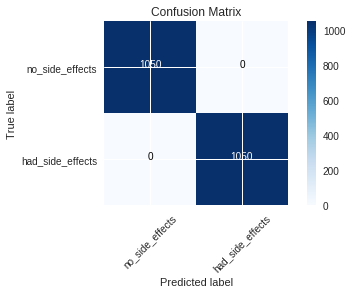

In [0]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [0]:
model.save("medical_trial_model.h5")

In [0]:
from keras.models import load_model

In [0]:
new_model = load_model("medical_trial_model.h5")

In [0]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [0]:
new_model.get_weights()

[array([[-0.10307963, -0.5419015 , -0.50813013, -0.11314046, -0.03948814,
          0.74857295, -0.11745089,  0.63280666, -0.36809957, -0.07700157,
          0.4800552 ,  0.636465  ,  0.75673074, -0.05597526, -0.5705619 ,
          0.7239438 ]], dtype=float32),
 array([ 0.3909689 ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.22115272,  0.        , -0.2545957 ,  0.        ,  0.        ,
        -0.20636974,  0.01198408, -0.21321635,  0.        ,  0.        ,
        -0.25302592], dtype=float32),
 array([[ 6.75519466e-01, -1.04317039e-01, -3.34094852e-01,
          9.00072008e-02,  1.78493969e-02,  2.57133812e-01,
         -3.81988108e-01,  2.08941191e-01, -1.09311476e-01,
         -4.19992000e-01, -1.83037445e-01,  7.12085962e-02,
          4.34213549e-01, -3.07341218e-01, -1.04436606e-01,
          3.23853374e-01, -2.26912975e-01,  7.15126514e-01,
         -4.29112315e-02, -2.49916822e-01, -1.01156928e-01,
          1.28126383e-01,  7.52505437e-02,  4.39139187e-01,
 

In [0]:
new_model.optimizer

In [0]:
#model to json
json_string = model.to_json()

In [0]:
json_string

'{"class_name": "Sequential", "config": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "b

In [0]:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [0]:
model_architecture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.save_weights("my_model_weights.h5")